# Эксперимент №1: Распределение Фишера

Для распределения Фишера имеем:

* Матожидание: 

$E(X) = \frac{m}{m-2}, m > 2$

* Дисперсия

$Var(X) = \frac{2m^2(k + m - 2)}{n(m-2)^2(m-4)}$

Также знаем, что при $m \rightarrow \infty$ матожидание $E \rightarrow 1$ (то есть буду сравнивать с нормальным распределением, у которого выборочное среднее = 1)

In [40]:
import numpy as np
import scipy.stats as sts
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, f

### 1. Наглядно продемонстрируйте центральную предельную теорему в действии для выбранного вами распределения (покажите сходимость с ростом выборки к нормальному распределению).

### 2. Для выбранного распределения сгенерируйте выборки разного объема и проиллюстрируйте сходимость выборочного среднего к математическому ожиданию (покажите наглядно стабилизацию выборочного среднего)

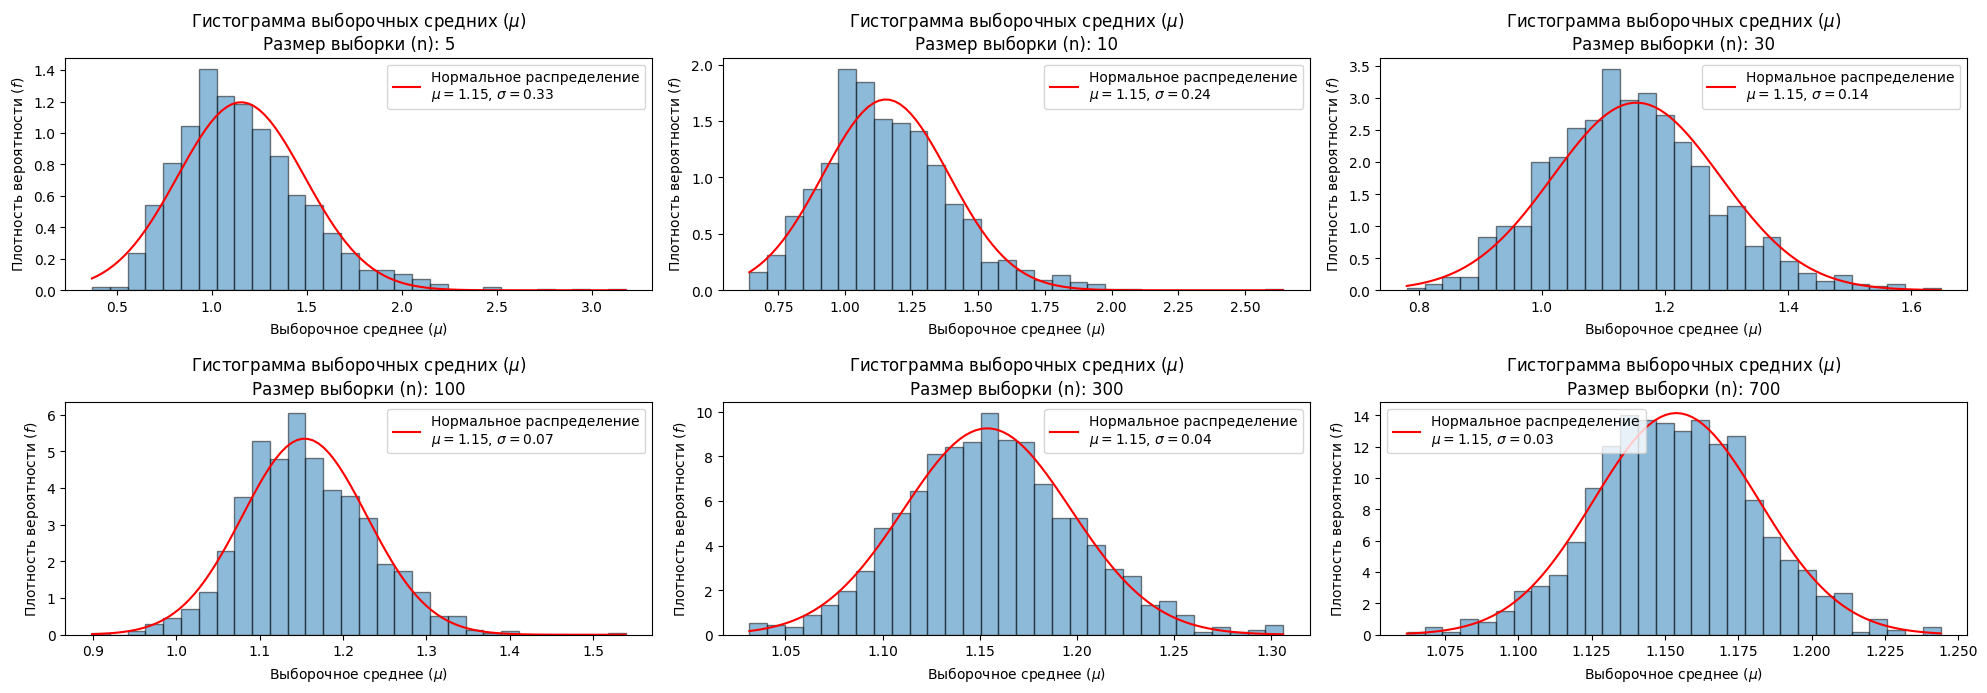

In [41]:
# Задам какие - нибудь степени свободы
k = 10
m = 15

# Матожидание:
mu = m / (m - 2)

# Размеры выборок
sample_sizes = [5, 10, 30, 100, 300, 700]

plt.figure(figsize=(20, 10))

# Для каждого размера выборки:

for i, size in enumerate(sample_sizes, 1):
    
    # Генерю выборки и вычисляю выборочное среднее:
    sample_means = []
    for _ in range(1000):
        sample = np.random.f(k, m, size)
        sample_means.append(np.mean(sample))
    
    
    # для каждого посчитаю ско (причем использую приближенную формулу 
    # для стандартного отклонения выборочных средних распределения Фишера), чтобы потом наложить нормальное распределение:
    
    # std_fish = np.sqrt((2 * pow(m, 2) * (k + m - 2))/(size * pow((m - 2), 2) * (m - 4)))/ np.sqrt(size)
    std_fish = np.sqrt((2 * m**2 * (k + m - 2)) / (k * (m - 2)**2 * (m - 4))) / np.sqrt(size)
    
    # строю гисторграму:
    plt.subplot(3, 3, i)
    count, bins, ignored = plt.hist(sample_means, bins=30, density=True, edgecolor='black', alpha=0.5)
    
    # Кривая нормального распределения (для сравнения)
    x = np.linspace(min(bins), max(bins), 100)
    y = norm.pdf(x, mu, std_fish)
    plt.plot(x, y, 'red', label=f'Нормальное распределение\n$\\mu = {mu:.2f}$, $\\sigma = {std_fish:.2f}$')

    plt.title(f'Гистограмма выборочных средних ($\\mu$)\nРазмер выборки (n): {size}')
    plt.xlabel('Выборочное среднее ($\\mu$)')
    plt.ylabel('Плотность вероятности ($f$)')
    plt.legend()
    
plt.tight_layout()
plt.show()

Еще можно сделать проще: посчитать для каждой выборки среднее значение (не 1000 раз считать среднее значение), но зато сделать это для бОльшего кол-ва выборок, и посмотреть, как выборочное среднее приближается к матожиданию ($\mu$):

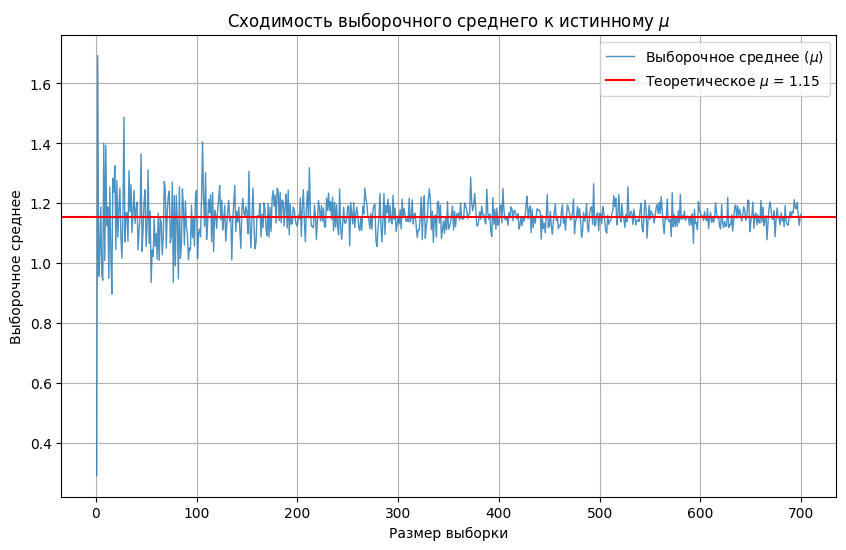

In [42]:
plt.figure(figsize=(10, 6))

means = []
sizes = []

# Генерирю выборки по Фишеру для сходимости и вычисляю выборочное среднее:
for size in range(1, max(sample_sizes) + 1):
    sample = f.rvs(k, m, size=size)
    mean = np.mean(sample)
    means.append(mean)
    sizes.append(size)

plt.plot(sizes, means, label="Выборочное среднее ($\\mu$)", alpha=0.8, lw=1)
plt.axhline(y=mu, color="red", label=f"Теоретическое $\\mu$ = {mu:.2f}")

plt.title("Сходимость выборочного среднего к истинному $\\mu$")
plt.xlabel("Размер выборки")
plt.ylabel("Выборочное среднее")
plt.legend()
plt.grid()
plt.show()

Итак, из представленного набора диаграмм (график 1), а также из графика №2 (выборочное среднее в зависимости от размера выборки) видно:

1) Согласно ЦПТ видим, что с увеличением размера выборки распределение выборочных средних будет стремиться к нормальному распределению, независимо от того, что у нас Фишер. То есть чем больше выборка, тем точнее (меньше варьируется) будет выборочное среднее.

2) Также у нас уменьшается стандартное отклонение (ско), что тоже идет из ЦПТ

3) Также на графике №2 отчетливо видно, что у нас стабилизируется выборочное среднее с ростом выборки. Кроме того, оно близко к 1, потому что как я написала выше, по свойству. Если мы возьмем еще больший m, то теор. среднее будет стремиться к 1.

# Эксперимент 2

Сгенерируйте выборки маленького/среднего/большого размера и для каждой из них постройте:

1) асимптотический доверительный интервал для среднего значения на базе ЦПТ
2) точный доверительный интервал для среднего значения (на базе t-критического значения)
3) эфронов доверительный интервал для среднего, медианы, моды, дисперсии.

Представьте по пунктам 3-5 сводный датафрейм в читабельном формате и предоставьте вывод о ширинах ДИ, есть ли соответствие фактическому распределению, откуда взята выборка.

In [43]:
# Выборки сгенерирую тоже с распределением Фишера

np.random.seed(57)

k = 10
m = 20

small_sample = np.random.f(k, m, size=20)
medium_sample = np.random.f(k, m, size=500)
large_sample = np.random.f(k, m, size=1000)

Ассимпотический доверительный интервал по ЦПТ:

$P(\bar{X_n} - z_{1 - \frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{X_n} + z_{1 - \frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1 - \alpha$

  Sample Size  Mean  95% CI Lower  95% CI Upper
0       Small  1.33          0.97          1.70
1      Medium  1.14          1.08          1.20
2       Large  1.14          1.09          1.18


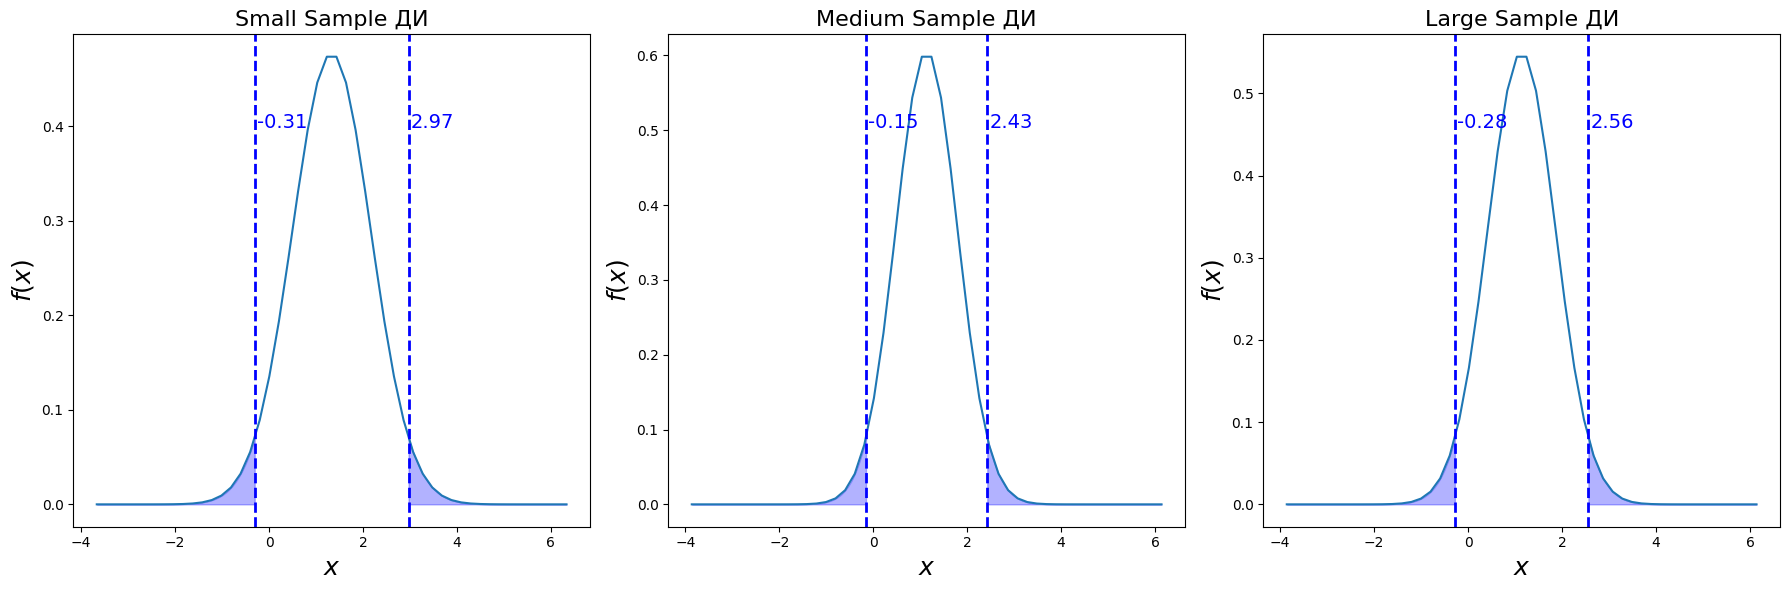

In [44]:
def calc_asymp_ci(data, confidence=0.95):
    '''Вычисляет асимптотический доверительный интервал'''
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    
    z_score = sts.norm.ppf(1 - (1 - confidence) / 2)
    
    margin_of_error = z_score * std / np.sqrt(n)
    
    # ДИ
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    
    return mean, ci_lower, ci_upper

def norm_conf_int(alpha, mean_hat, std_hat, margin=5, ax=None):
    '''Строит 95% асимптотически-нормальный доверительный интервал'''
    
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = sts.norm(mean_hat, std_hat).pdf(xs)

    ax.plot(xs, pdf)
    ax.set_ylabel('$f(x)$', fontsize=18)
    ax.set_xlabel('$x$', fontsize=18)

    left, right = sts.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)
    
    for i in [left, right]: 
        y_max = ax.get_ylim()[1]
        ax.axvline(i, color="blue", linestyle='dashed', lw=2)
        
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)
        
        text_margin = 0.05
        ax.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = sts.norm(mean_hat, std_hat).pdf(xq)
        ax.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

results = []


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

samples = {
    'small': small_sample,
    'medium': medium_sample,
    'large': large_sample
}

# Для каждой выборки считаю и вывожуК результаты
for idx, (size, sample) in enumerate(samples.items()):
    mean, ci_lower, ci_upper = calc_asymp_ci(sample)
    
    results.append({
        'Sample Size': size.capitalize(),
        'Mean': round(mean, 2),
        '95% CI Lower': round(ci_lower, 2),
        '95% CI Upper': round(ci_upper, 2)
    })
    

    norm_conf_int(0.05, mean, np.std(sample, ddof=1), margin=5, ax=axs[idx])
    axs[idx].set_title(f'{size.capitalize()} Sample ДИ', fontsize=16)

df = pd.DataFrame(results)
print(df)

plt.tight_layout()
plt.show()

Точный доверительный интервал для среднего значения (на базе t-критического значения)

$\left[\bar{X} - t_{1 - \alpha/2} \cdot \frac{S}{\sqrt{n}}, \bar{X} + t_{1 - \alpha/2} \cdot \frac{S}{\sqrt{n}}\right]$

где:
- $\bar{X}$ — выборочное среднее,
- $t_{\alpha/2}$ — t-критическое значение для уровня значимости $ \alpha $ и $ n-1 $ степеней свободы,
- $ S $ — стандартное отклонение выборки,
- $ n $ — размер выборки.


  Sample Size  Mean  95% CI Lower  95% CI Upper
0       Small  1.33          0.94          1.72
1      Medium  1.14          1.08          1.20
2       Large  1.14          1.09          1.18


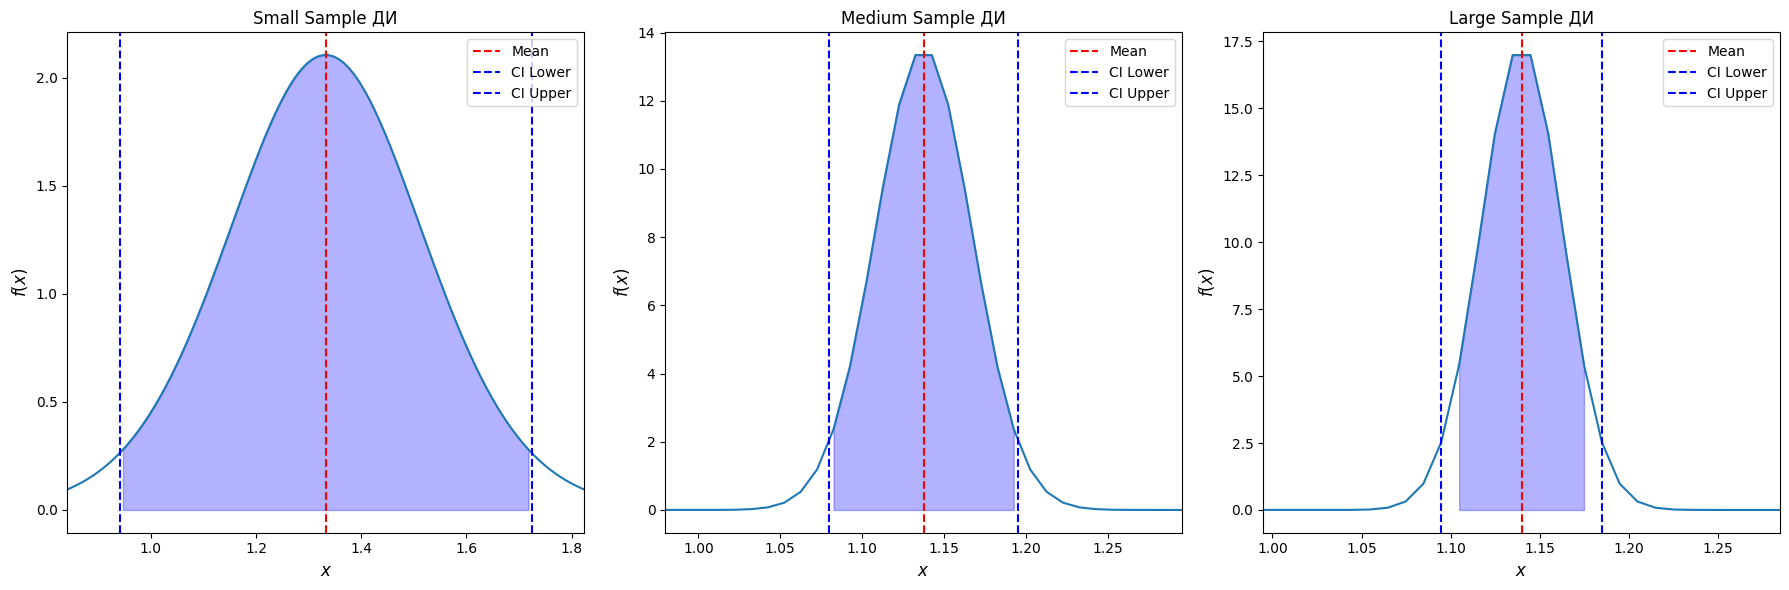

In [45]:
def t_confidence_interval(sample, alpha=0.05):
    '''Вычисляет точный доверительный интервал для среднего значения'''
    n = len(sample)
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)

    t_crit = sts.t.ppf(1 - alpha/2, df=n-1)

    se = std / np.sqrt(n)

    left = mean - t_crit * se
    right = mean + t_crit * se
    
    return mean, left, right


def plot_confidence_interval(ax, mean, left, right, sample, margin=5):
    '''Строит 95% точный доверительный интервал'''

    xs = np.linspace(mean - margin, mean + margin, 1000)
    pdf = sts.t.pdf(xs, df=len(sample)-1, loc=mean, scale=np.std(sample, ddof=1) / np.sqrt(len(sample)))

    ax.plot(xs, pdf)
    ax.axvline(mean, color='red', linestyle='dashed', label="Mean")
    ax.axvline(left, color="blue", linestyle='dashed', label="CI Lower")
    ax.axvline(right, color="blue", linestyle='dashed', label="CI Upper")
    
    ax.fill_between(xs, 0, pdf, where=(xs >= left) & (xs <= right), color='blue', alpha=0.3)
    
    ax.set_ylabel('$f(x)$', fontsize=12)
    ax.set_xlabel('$x$', fontsize=12)
    ax.legend()
    
    ax.set_xlim(left - 0.1, right + 0.1)
    ax.set_title(f"{size.capitalize()} Sample ДИ", fontsize=12)


results = []

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

samples = {
    'small': small_sample,
    'medium': medium_sample,
    'large': large_sample
}

for idx, (size, sample) in enumerate(samples.items()):
    mean, ci_lower, ci_upper = t_confidence_interval(sample)
    
    results.append({
        'Sample Size': size.capitalize(),
        'Mean': round(mean, 2),
        '95% CI Lower': round(ci_lower, 2),
        '95% CI Upper': round(ci_upper, 2)
    })
    
    plot_confidence_interval(axs[idx], mean, ci_lower, ci_upper, sample, margin=5)

df = pd.DataFrame(results)
print(df)

plt.tight_layout()
plt.show()

Эфронов доверительный интервал для среднего, медианы, моды, дисперсии (Бутстрап)

   Sample Size Statistic  Mean  95% CI Lower  95% CI Upper
0        Small      Mean  1.33          1.00          1.71
1        Small    Median  1.11          0.93          1.57
2        Small      Mode  1.08          0.16          3.60
3        Small  Variance  0.66          0.24          1.21
4       Medium      Mean  1.14          1.08          1.20
5       Medium    Median  1.00          0.95          1.08
6       Medium      Mode  0.88          0.23          2.38
7       Medium  Variance  0.43          0.35          0.54
8        Large      Mean  1.14          1.10          1.19
9        Large    Median  0.99          0.95          1.03
10       Large      Mode  0.85          0.19          2.37
11       Large  Variance  0.53          0.42          0.65


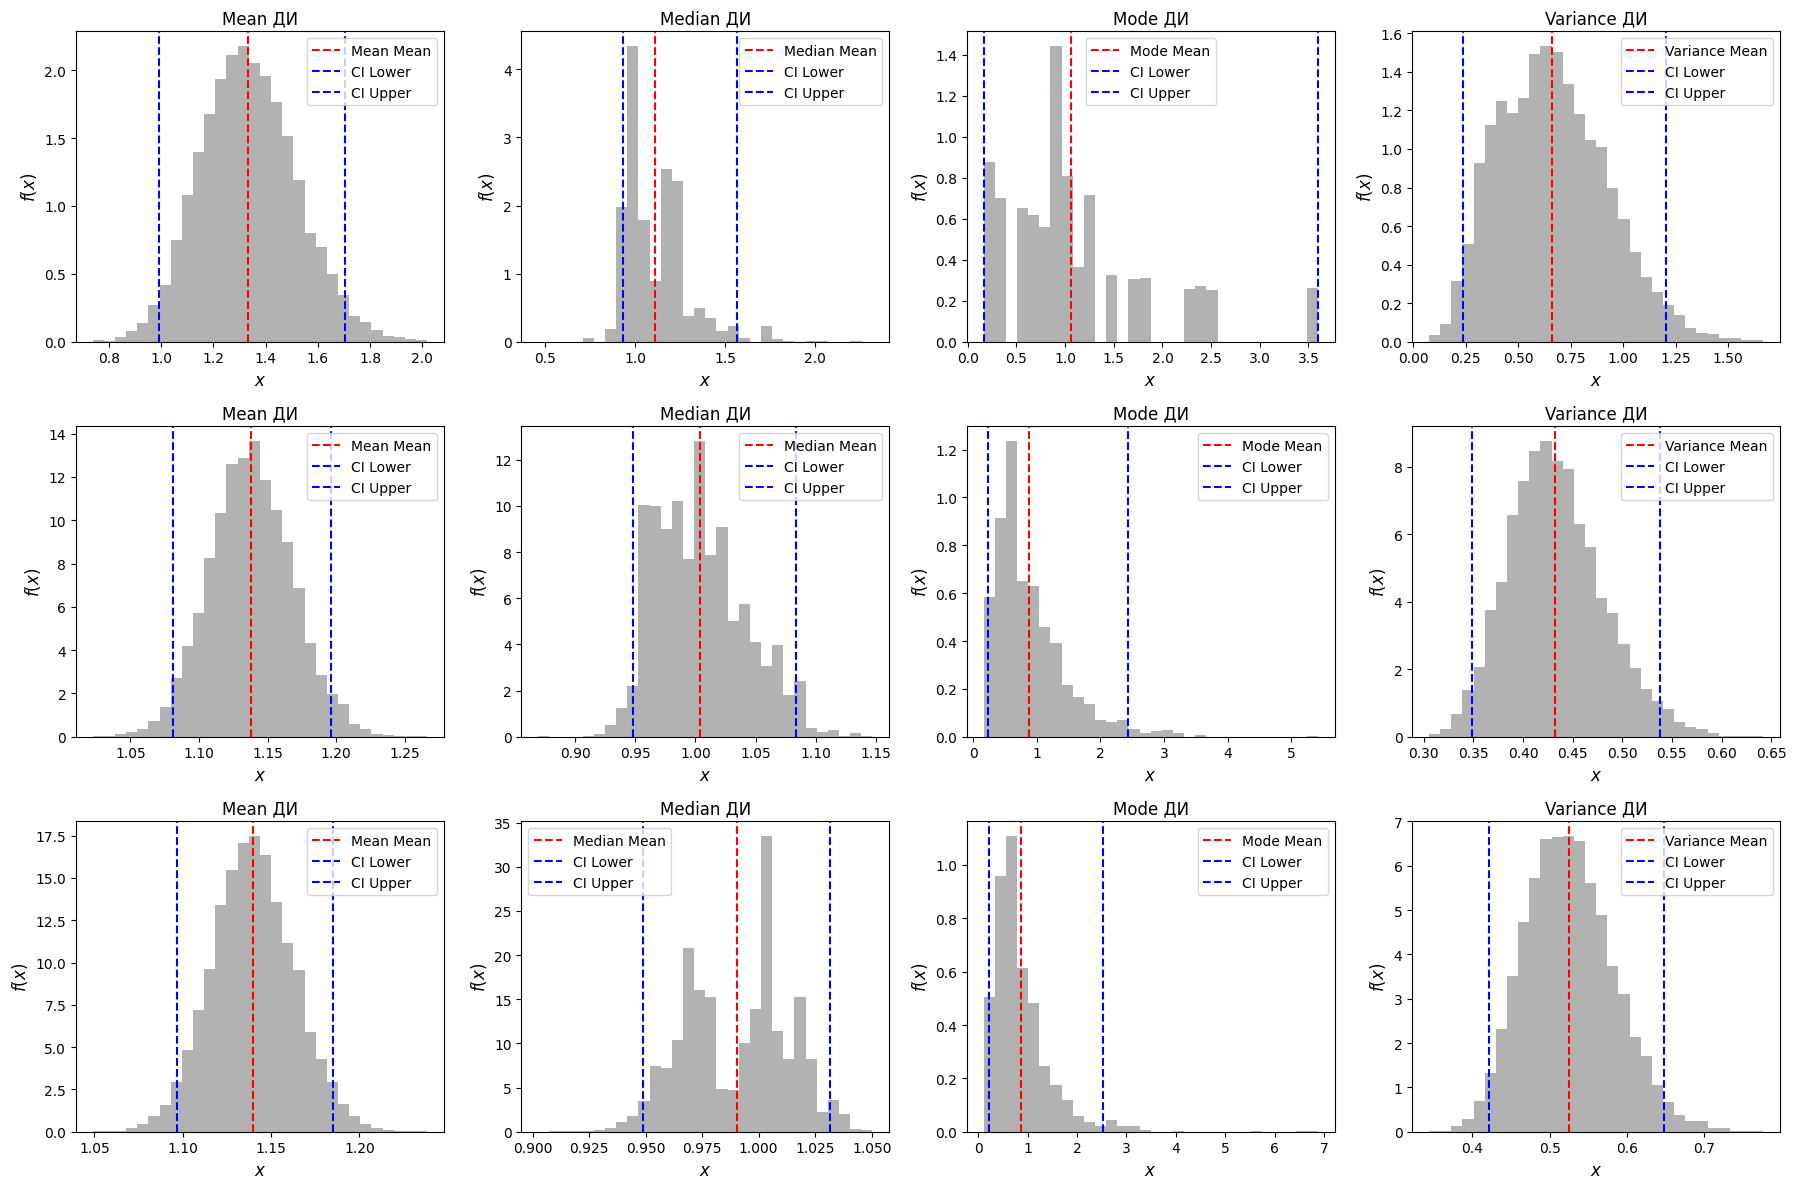

In [46]:
def bootstrap_ci(sample, statistic, alpha=0.05, n_iter=10000):
    '''Вычисляет бутстрэпный доверительный интервал для статистики'''
    bootstrap_samples = np.random.choice(sample, (n_iter, len(sample)), replace=True)

    bootstrap_statistics = np.array([statistic(bs) for bs in bootstrap_samples])

    lower = np.percentile(bootstrap_statistics, 100 * (alpha / 2))
    upper = np.percentile(bootstrap_statistics, 100 * (1 - alpha / 2))
    
    return lower, upper, np.mean(bootstrap_statistics)

def mean_stat(sample):
    return np.mean(sample)

def median_stat(sample):
    return np.median(sample)

def mode_stat(sample):
    mode_result = sts.mode(sample)
    mode_val = mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) else mode_result.mode
    return mode_val

def var_stat(sample):
    return np.var(sample, ddof=1)

def plot_bootstrap_ci(ax, sample, statistic, stat_name, alpha=0.05, n_iter=10000, margin=5):
    '''Строит график бутстрэпного доверительного интервала для статистики'''
    
    lower, upper, mean_stat_value = bootstrap_ci(sample, statistic, alpha=alpha, n_iter=n_iter)

    bootstrap_samples = np.random.choice(sample, (n_iter, len(sample)), replace=True)
    
    bootstrap_statistics = np.array([statistic(bs) for bs in bootstrap_samples])

    ax.hist(bootstrap_statistics, bins=30, density=True, alpha=0.6, color='gray')

    ax.axvline(mean_stat_value, color='red', linestyle='dashed', label=f'{stat_name} Mean')
    ax.axvline(lower, color="blue", linestyle='dashed', label="CI Lower")
    ax.axvline(upper, color="blue", linestyle='dashed', label="CI Upper")
    
    ax.set_ylabel('$f(x)$', fontsize=12)
    ax.set_xlabel('$x$', fontsize=12)
    ax.legend()
    
    ax.set_title(f"{stat_name} ДИ", fontsize=12)

samples = {
    'small': small_sample,
    'medium': medium_sample,
    'large': large_sample
}

results = []

fig, axs = plt.subplots(3, 4, figsize=(18, 12))

for idx, (size, sample) in enumerate(samples.items()):
    for j, (stat_name, statistic) in enumerate({
        "Mean": mean_stat,
        "Median": median_stat,
        "Mode": mode_stat,
        "Variance": var_stat
    }.items()):
        
        lower, upper, mean_stat_value = bootstrap_ci(sample, statistic)

        results.append({
            'Sample Size': size.capitalize(),
            'Statistic': stat_name,
            'Mean': round(mean_stat_value, 2),
            '95% CI Lower': round(lower, 2),
            '95% CI Upper': round(upper, 2)
        })

        ax = axs[idx, j]
        plot_bootstrap_ci(ax, sample, statistic, stat_name, alpha=0.05, n_iter=10000, margin=5)

df = pd.DataFrame(results)
print(df)

plt.tight_layout()
plt.show()

Ширина доверительных интервалов: Интервалы для маленькой выборки будут более широкими из-за большего влияния случайных отклонений. Для больших выборок интервалы становятся уже, так как ЦПТ начинает работать.

Все интервалы — асимптотические, точные и бутстрэпные — для больших выборок почти совпадают, что указывает на то, что для больших выборок выборочные статистики становятся близкими к истинному значению, а методы становятся более похожими друг на друга.

Соответствие фактическому распределению: Выборки были взяты из распределения Фишера, , что может объяснить широкие доверительные интервалы для статистик, таких как мода и дисперсия в малых выборках, поскольку распределение Фишера является асимметричным, а статистики могут сильно варьироваться для малых выборок.